In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("../data/Wholesale_customers_data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
channel = df["Channel"]
# channel

In [7]:
df.drop(["Channel", "Region"], axis=1, inplace=True)

In [8]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Scale Data

In [10]:
from sklearn import preprocessing


X_scaled = preprocessing.scale(df)
X_scaled

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_r = pca.fit_transform(X_scaled)


In [27]:
print(pca.explained_variance_)

[2.65099857 1.70646229]


In [28]:
print(pca.explained_variance_ratio_)

[0.44082893 0.283764  ]


In [29]:
print(pca.explained_variance_ratio_.cumsum())

[0.44082893 0.72459292]


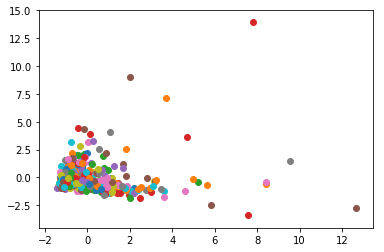

In [30]:
import matplotlib.pyplot as plt

for k, (i,j) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
    plt.scatter(i, j)
    
plt.show()

## K-Means

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


km = KMeans(n_clusters=2)
km.fit(X_r)
print(km.cluster_centers_)

[[ 3.98727578 -0.34166281]
 [-0.38778991  0.03322905]]
